# 04 - Entraînement des Modèles (Version Simplifiée)

Ce notebook teste 2 modèles :
1. **Random Forest**
2. **XGBoost**

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
import optuna
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline
print("✓ Imports OK")

✓ Imports OK


/Users/jeremie.letarnec/work/lbc-auto-evaluation/mobility-market-values/pipelines/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Charger données
X = pd.read_csv('../data/processed/X_features.csv')
y = pd.read_csv('../data/processed/y_target.csv').values.ravel()
print(f"X: {X.shape}, y: {y.shape}")
print(f"Fraudes: {(y==1).sum()/len(y)*100:.2f}%")

X: (10000, 10), y: (10000,)
Fraudes: 5.51%


In [3]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scale_pos_weight = (y_train==0).sum() / (y_train==1).sum()
print(f"Train: {len(X_train)}, Test: {len(X_test)}")
print(f"Scale pos weight: {scale_pos_weight:.2f}")

Train: 8000, Test: 2000
Scale pos weight: 17.14


In [4]:
# Fonction évaluation
def evaluate(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    print(f"\n{'='*80}\n{name}\n{'='*80}")
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.4f} ⭐")
    print(f"F1:        {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC:   {roc_auc_score(y_test, y_proba):.4f}")
    print(f"\n{classification_report(y_test, y_pred, target_names=['Normal', 'Fraude'])}")
    
    # Graphiques
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], xticklabels=['Normal', 'Fraude'], yticklabels=['Normal', 'Fraude'])
    axes[0].set_title(f'Matrice - {name}', fontweight='bold')
    axes[0].set_ylabel('Vraie classe')
    axes[0].set_xlabel('Prédite')
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    axes[1].plot(fpr, tpr, linewidth=2, label=f'AUC={roc_auc_score(y_test, y_proba):.4f}')
    axes[1].plot([0,1], [0,1], 'k--', label='Random')
    axes[1].set_title(f'ROC - {name}', fontweight='bold')
    axes[1].set_xlabel('FPR')
    axes[1].set_ylabel('TPR')
    axes[1].legend()
    axes[1].grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return {'name': name, 'accuracy': accuracy_score(y_test, y_pred), 'precision': precision_score(y_test, y_pred), 'recall': recall_score(y_test, y_pred), 'f1': f1_score(y_test, y_pred), 'roc_auc': roc_auc_score(y_test, y_proba)}

print("✓ Fonction créée")

✓ Fonction créée


[I 2025-12-17 15:41:40,616] A new study created in memory with name: no-name-2889a524-aad6-4996-9c14-d44518a35962


🌲 RANDOM FOREST - Optuna (30 trials)


Best trial: 0. Best value: 0.211268:   3%|▎         | 1/30 [00:02<01:06,  2.28s/it]

[I 2025-12-17 15:41:42,903] Trial 0 finished with value: 0.2112678928903073 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.2112678928903073.


Best trial: 0. Best value: 0.211268:   7%|▋         | 2/30 [00:03<00:49,  1.75s/it]

[I 2025-12-17 15:41:44,289] Trial 1 finished with value: 0.20911789939655234 and parameters: {'n_estimators': 65, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.2112678928903073.


Best trial: 0. Best value: 0.211268:  10%|█         | 3/30 [00:05<00:43,  1.61s/it]

[I 2025-12-17 15:41:45,730] Trial 2 finished with value: 0.1983716956671656 and parameters: {'n_estimators': 117, 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.2112678928903073.


Best trial: 0. Best value: 0.211268:  13%|█▎        | 4/30 [00:06<00:39,  1.50s/it]

[I 2025-12-17 15:41:47,069] Trial 3 finished with value: 0.20212019929534053 and parameters: {'n_estimators': 108, 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.2112678928903073.


Best trial: 0. Best value: 0.211268:  17%|█▋        | 5/30 [00:07<00:35,  1.44s/it]

[I 2025-12-17 15:41:48,394] Trial 4 finished with value: 0.21014848097887517 and parameters: {'n_estimators': 60, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.2112678928903073.


Best trial: 0. Best value: 0.211268:  20%|██        | 6/30 [00:08<00:26,  1.12s/it]

[I 2025-12-17 15:41:48,871] Trial 5 finished with value: 0.07917765803885272 and parameters: {'n_estimators': 130, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.2112678928903073.


Best trial: 0. Best value: 0.211268:  23%|██▎       | 7/30 [00:08<00:20,  1.12it/s]

[I 2025-12-17 15:41:49,326] Trial 6 finished with value: 0.2090177286639366 and parameters: {'n_estimators': 143, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.2112678928903073.


Best trial: 0. Best value: 0.211268:  27%|██▋       | 8/30 [00:09<00:16,  1.33it/s]

[I 2025-12-17 15:41:49,771] Trial 7 finished with value: 0.19778007587435298 and parameters: {'n_estimators': 171, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.2112678928903073.


Best trial: 8. Best value: 0.214207:  30%|███       | 9/30 [00:09<00:12,  1.66it/s]

[I 2025-12-17 15:41:50,042] Trial 8 finished with value: 0.21420724044233122 and parameters: {'n_estimators': 98, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 8 with value: 0.21420724044233122.


Best trial: 8. Best value: 0.214207:  33%|███▎      | 10/30 [00:09<00:09,  2.01it/s]

[I 2025-12-17 15:41:50,311] Trial 9 finished with value: 0.19524514152536052 and parameters: {'n_estimators': 91, 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 8 with value: 0.21420724044233122.


Best trial: 8. Best value: 0.214207:  37%|███▋      | 11/30 [00:09<00:08,  2.26it/s]

[I 2025-12-17 15:41:50,627] Trial 10 finished with value: 0.03231369020842705 and parameters: {'n_estimators': 86, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 8 with value: 0.21420724044233122.


Best trial: 8. Best value: 0.214207:  40%|████      | 12/30 [00:10<00:07,  2.32it/s]

[I 2025-12-17 15:41:51,028] Trial 11 finished with value: 0.2105447703786506 and parameters: {'n_estimators': 183, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 8 with value: 0.21420724044233122.


Best trial: 8. Best value: 0.214207:  43%|████▎     | 13/30 [00:10<00:07,  2.25it/s]

[I 2025-12-17 15:41:51,505] Trial 12 finished with value: 0.21278110916865034 and parameters: {'n_estimators': 197, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 8 with value: 0.21420724044233122.


Best trial: 8. Best value: 0.214207:  47%|████▋     | 14/30 [00:11<00:06,  2.32it/s]

[I 2025-12-17 15:41:51,905] Trial 13 finished with value: 0.20889353395924 and parameters: {'n_estimators': 153, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 8 with value: 0.21420724044233122.


Best trial: 8. Best value: 0.214207:  50%|█████     | 15/30 [00:11<00:05,  2.59it/s]

[I 2025-12-17 15:41:52,189] Trial 14 finished with value: 0.19107082051223867 and parameters: {'n_estimators': 93, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 8 with value: 0.21420724044233122.


Best trial: 8. Best value: 0.214207:  53%|█████▎    | 16/30 [00:11<00:05,  2.59it/s]

[I 2025-12-17 15:41:52,576] Trial 15 finished with value: 0.21024906216498476 and parameters: {'n_estimators': 155, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 8 with value: 0.21420724044233122.


Best trial: 8. Best value: 0.214207:  57%|█████▋    | 17/30 [00:12<00:05,  2.37it/s]

[I 2025-12-17 15:41:53,079] Trial 16 finished with value: 0.21266964171223002 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 8 with value: 0.21420724044233122.


Best trial: 8. Best value: 0.214207:  60%|██████    | 18/30 [00:12<00:04,  2.68it/s]

[I 2025-12-17 15:41:53,341] Trial 17 finished with value: 0.18691765210291203 and parameters: {'n_estimators': 74, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 8 with value: 0.21420724044233122.


Best trial: 18. Best value: 0.215148:  67%|██████▋   | 20/30 [00:13<00:02,  3.37it/s]

[I 2025-12-17 15:41:53,646] Trial 18 finished with value: 0.21514774498429537 and parameters: {'n_estimators': 109, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 18 with value: 0.21514774498429537.
[I 2025-12-17 15:41:53,812] Trial 19 finished with value: 0.19411961615418397 and parameters: {'n_estimators': 50, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 18 with value: 0.21514774498429537.


Best trial: 20. Best value: 0.21624:  70%|███████   | 21/30 [00:13<00:02,  3.44it/s] 

[I 2025-12-17 15:41:54,088] Trial 20 finished with value: 0.2162404163635346 and parameters: {'n_estimators': 109, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 20 with value: 0.2162404163635346.


Best trial: 21. Best value: 0.216528:  73%|███████▎  | 22/30 [00:13<00:02,  3.54it/s]

[I 2025-12-17 15:41:54,351] Trial 21 finished with value: 0.21652752081661705 and parameters: {'n_estimators': 107, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 21 with value: 0.21652752081661705.


Best trial: 21. Best value: 0.216528:  77%|███████▋  | 23/30 [00:14<00:02,  3.24it/s]

[I 2025-12-17 15:41:54,721] Trial 22 finished with value: 0.19427024514774993 and parameters: {'n_estimators': 126, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 21 with value: 0.21652752081661705.


Best trial: 21. Best value: 0.216528:  80%|████████  | 24/30 [00:14<00:01,  3.16it/s]

[I 2025-12-17 15:41:55,056] Trial 23 finished with value: 0.2145033964623485 and parameters: {'n_estimators': 110, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 21 with value: 0.21652752081661705.


Best trial: 21. Best value: 0.216528:  83%|████████▎ | 25/30 [00:14<00:01,  3.02it/s]

[I 2025-12-17 15:41:55,419] Trial 24 finished with value: 0.20607258053308675 and parameters: {'n_estimators': 137, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 21 with value: 0.21652752081661705.


Best trial: 21. Best value: 0.216528:  87%|████████▋ | 26/30 [00:15<00:01,  3.23it/s]

[I 2025-12-17 15:41:55,681] Trial 25 finished with value: 0.21496118152980717 and parameters: {'n_estimators': 107, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 21 with value: 0.21652752081661705.


Best trial: 21. Best value: 0.216528:  90%|█████████ | 27/30 [00:15<00:00,  3.47it/s]

[I 2025-12-17 15:41:55,916] Trial 26 finished with value: 0.16873220905471428 and parameters: {'n_estimators': 78, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 21 with value: 0.21652752081661705.


Best trial: 21. Best value: 0.216528:  93%|█████████▎| 28/30 [00:15<00:00,  3.41it/s]

[I 2025-12-17 15:41:56,222] Trial 27 finished with value: 0.21232969583711747 and parameters: {'n_estimators': 119, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 21 with value: 0.21652752081661705.


Best trial: 29. Best value: 0.216976: 100%|██████████| 30/30 [00:16<00:00,  1.86it/s]


[I 2025-12-17 15:41:56,525] Trial 28 finished with value: 0.1863457524982792 and parameters: {'n_estimators': 99, 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 21 with value: 0.21652752081661705.
[I 2025-12-17 15:41:56,723] Trial 29 finished with value: 0.21697565059551507 and parameters: {'n_estimators': 81, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 29 with value: 0.21697565059551507.
Meilleur F1 (CV): 0.2170
Params: {'n_estimators': 81, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 3}

Random Forest
Accuracy:  0.7650
Precision: 0.1070
Recall:    0.4455 ⭐
F1:        0.1725
ROC-AUC:   0.6695

              precision    recall  f1-score   support

      Normal       0.96      0.78      0.86      1890
      Fraude       0.11      0.45      0.17       110

    accuracy                           0.77      2000
   macro avg       0.53      0.61      0.52      2000
weighted avg       0.91      0.77      0.83   

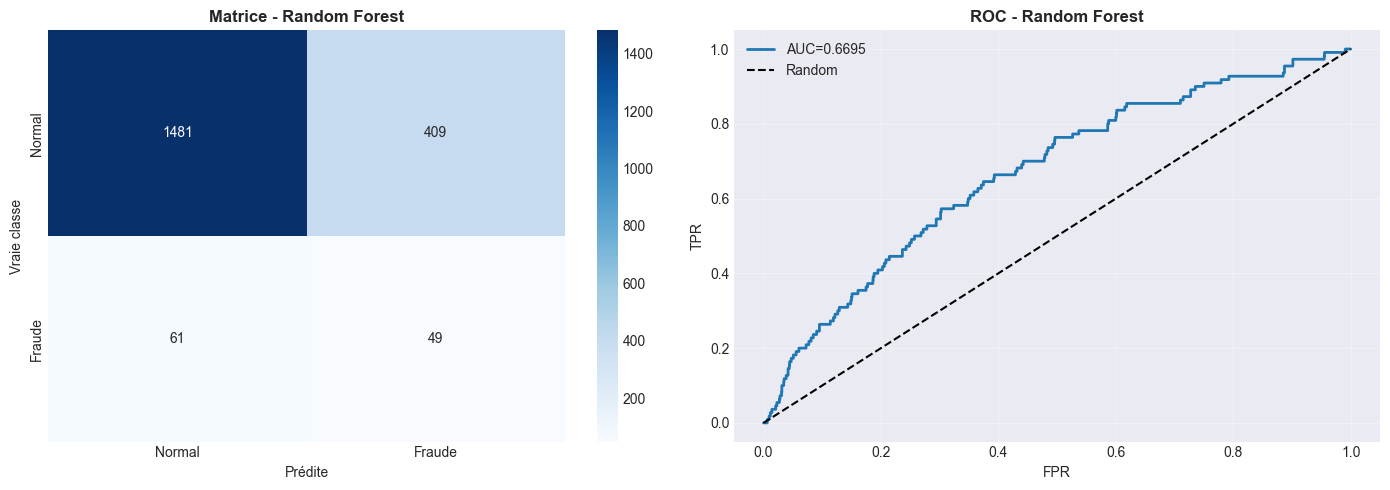

In [5]:
# RANDOM FOREST avec Optuna
print("🌲 RANDOM FOREST - Optuna (30 trials)")
def obj_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'class_weight': 'balanced',
        'random_state': 42
    }
    model = RandomForestClassifier(**params)
    return cross_val_score(model, X_train, y_train, cv=3, scoring='f1', n_jobs=-1).mean()

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(obj_rf, n_trials=30, show_progress_bar=True)
print(f"Meilleur F1 (CV): {study_rf.best_value:.4f}")
print(f"Params: {study_rf.best_params}")

best_rf = RandomForestClassifier(**study_rf.best_params, class_weight='balanced', random_state=42)
best_rf.fit(X_train, y_train)
results_rf = evaluate(best_rf, X_test, y_test, "Random Forest")

[I 2025-12-17 15:41:57,128] A new study created in memory with name: no-name-f511ad70-de1c-4c2b-93f2-058930fffc5e


🚀 XGBOOST - Optuna (30 trials)


Best trial: 0. Best value: 0.205703:   0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-12-17 15:41:57,201] Trial 0 finished with value: 0.2057027486578035 and parameters: {'n_estimators': 67, 'max_depth': 5, 'learning_rate': 0.0436740590657818, 'subsample': 0.8609152177580957}. Best is trial 0 with value: 0.2057027486578035.


Best trial: 0. Best value: 0.205703:   7%|▋         | 2/30 [00:00<00:03,  8.66it/s]

[I 2025-12-17 15:41:57,359] Trial 1 finished with value: 0.09353149341164951 and parameters: {'n_estimators': 155, 'max_depth': 8, 'learning_rate': 0.2606263845260986, 'subsample': 0.765641077604951}. Best is trial 0 with value: 0.2057027486578035.


Best trial: 0. Best value: 0.205703:  13%|█▎        | 4/30 [00:00<00:02, 12.13it/s]

[I 2025-12-17 15:41:57,415] Trial 2 finished with value: 0.19197443807187128 and parameters: {'n_estimators': 113, 'max_depth': 3, 'learning_rate': 0.1267061676481681, 'subsample': 0.7238066154227243}. Best is trial 0 with value: 0.2057027486578035.
[I 2025-12-17 15:41:57,478] Trial 3 finished with value: 0.1920777070600963 and parameters: {'n_estimators': 118, 'max_depth': 4, 'learning_rate': 0.15250000296254712, 'subsample': 0.878965466065473}. Best is trial 0 with value: 0.2057027486578035.


Best trial: 0. Best value: 0.205703:  13%|█▎        | 4/30 [00:00<00:02, 12.13it/s]

[I 2025-12-17 15:41:57,579] Trial 4 finished with value: 0.12469586374695862 and parameters: {'n_estimators': 108, 'max_depth': 8, 'learning_rate': 0.2483052094545362, 'subsample': 0.6668458588089932}. Best is trial 0 with value: 0.2057027486578035.


Best trial: 0. Best value: 0.205703:  20%|██        | 6/30 [00:00<00:01, 12.97it/s]

[I 2025-12-17 15:41:57,619] Trial 5 finished with value: 0.20149141936414616 and parameters: {'n_estimators': 64, 'max_depth': 4, 'learning_rate': 0.029623796895551755, 'subsample': 0.7275509250649499}. Best is trial 0 with value: 0.2057027486578035.


Best trial: 0. Best value: 0.205703:  20%|██        | 6/30 [00:00<00:01, 12.97it/s]

[I 2025-12-17 15:41:57,781] Trial 6 finished with value: 0.13480963480963482 and parameters: {'n_estimators': 186, 'max_depth': 9, 'learning_rate': 0.06376196366193054, 'subsample': 0.9133998720268122}. Best is trial 0 with value: 0.2057027486578035.


Best trial: 0. Best value: 0.205703:  27%|██▋       | 8/30 [00:00<00:02,  9.72it/s]

[I 2025-12-17 15:41:57,904] Trial 7 finished with value: 0.09434145755782271 and parameters: {'n_estimators': 146, 'max_depth': 8, 'learning_rate': 0.2600313718307994, 'subsample': 0.8802628538025947}. Best is trial 0 with value: 0.2057027486578035.


Best trial: 0. Best value: 0.205703:  33%|███▎      | 10/30 [00:00<00:01, 10.12it/s]

[I 2025-12-17 15:41:57,996] Trial 8 finished with value: 0.1702277586369809 and parameters: {'n_estimators': 178, 'max_depth': 4, 'learning_rate': 0.11560916094936968, 'subsample': 0.6062268844484252}. Best is trial 0 with value: 0.2057027486578035.
[I 2025-12-17 15:41:58,087] Trial 9 finished with value: 0.17321614196962165 and parameters: {'n_estimators': 111, 'max_depth': 6, 'learning_rate': 0.14804537007266674, 'subsample': 0.8455947698593578}. Best is trial 0 with value: 0.2057027486578035.


Best trial: 0. Best value: 0.205703:  33%|███▎      | 10/30 [00:01<00:01, 10.12it/s]

[I 2025-12-17 15:41:58,171] Trial 10 finished with value: 0.19776697577221838 and parameters: {'n_estimators': 64, 'max_depth': 6, 'learning_rate': 0.023379822229620723, 'subsample': 0.9843199520300708}. Best is trial 0 with value: 0.2057027486578035.


Best trial: 0. Best value: 0.205703:  47%|████▋     | 14/30 [00:01<00:01, 12.26it/s]

[I 2025-12-17 15:41:58,227] Trial 11 finished with value: 0.20524049140190878 and parameters: {'n_estimators': 54, 'max_depth': 5, 'learning_rate': 0.012226151327671582, 'subsample': 0.7777107380055576}. Best is trial 0 with value: 0.2057027486578035.
[I 2025-12-17 15:41:58,289] Trial 12 finished with value: 0.20001418274642768 and parameters: {'n_estimators': 53, 'max_depth': 5, 'learning_rate': 0.07396193722242386, 'subsample': 0.8194385537771867}. Best is trial 0 with value: 0.2057027486578035.
[I 2025-12-17 15:41:58,360] Trial 13 finished with value: 0.18056034360140413 and parameters: {'n_estimators': 80, 'max_depth': 5, 'learning_rate': 0.20377058065675022, 'subsample': 0.9489557033751911}. Best is trial 0 with value: 0.2057027486578035.


Best trial: 0. Best value: 0.205703:  53%|█████▎    | 16/30 [00:01<00:01, 11.53it/s]

[I 2025-12-17 15:41:58,430] Trial 14 finished with value: 0.1895444353064395 and parameters: {'n_estimators': 84, 'max_depth': 7, 'learning_rate': 0.07614476659183744, 'subsample': 0.7826941458649289}. Best is trial 0 with value: 0.2057027486578035.
[I 2025-12-17 15:41:58,556] Trial 15 finished with value: 0.155308766508602 and parameters: {'n_estimators': 87, 'max_depth': 10, 'learning_rate': 0.021180008213729618, 'subsample': 0.8357091478217874}. Best is trial 0 with value: 0.2057027486578035.
[I 2025-12-17 15:41:58,600] Trial 16 finished with value: 0.17985762294417026 and parameters: {'n_estimators': 56, 'max_depth': 5, 'learning_rate': 0.20135604473480959, 'subsample': 0.7517201593490516}. Best is trial 0 with value: 0.2057027486578035.


Best trial: 0. Best value: 0.205703:  63%|██████▎   | 19/30 [00:01<00:00, 13.64it/s]

[I 2025-12-17 15:41:58,644] Trial 17 finished with value: 0.1940956687958176 and parameters: {'n_estimators': 90, 'max_depth': 3, 'learning_rate': 0.05299242028250389, 'subsample': 0.685633568756275}. Best is trial 0 with value: 0.2057027486578035.
[I 2025-12-17 15:41:58,716] Trial 18 finished with value: 0.1881833666208423 and parameters: {'n_estimators': 72, 'max_depth': 6, 'learning_rate': 0.10365452645618062, 'subsample': 0.80116121551118}. Best is trial 0 with value: 0.2057027486578035.
[I 2025-12-17 15:41:58,822] Trial 19 finished with value: 0.12187369723898818 and parameters: {'n_estimators': 136, 'max_depth': 7, 'learning_rate': 0.29773158309780995, 'subsample': 0.8843915496737577}. Best is trial 0 with value: 0.2057027486578035.


Best trial: 0. Best value: 0.205703:  77%|███████▋  | 23/30 [00:01<00:00, 14.25it/s]

[I 2025-12-17 15:41:58,879] Trial 20 finished with value: 0.2036621479277894 and parameters: {'n_estimators': 97, 'max_depth': 5, 'learning_rate': 0.012278321004814602, 'subsample': 0.9233314602731113}. Best is trial 0 with value: 0.2057027486578035.
[I 2025-12-17 15:41:58,948] Trial 21 finished with value: 0.20019989714004324 and parameters: {'n_estimators': 101, 'max_depth': 5, 'learning_rate': 0.013515888843617206, 'subsample': 0.9295752034691349}. Best is trial 0 with value: 0.2057027486578035.
[I 2025-12-17 15:41:58,992] Trial 22 finished with value: 0.19780081135314354 and parameters: {'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.043565203080146, 'subsample': 0.8622075560317359}. Best is trial 0 with value: 0.2057027486578035.
[I 2025-12-17 15:41:59,040] Trial 23 finished with value: 0.20109133734501725 and parameters: {'n_estimators': 72, 'max_depth': 5, 'learning_rate': 0.0878789915287473, 'subsample': 0.994468762095802}. Best is trial 0 with value: 0.2057027486578035

Best trial: 0. Best value: 0.205703:  90%|█████████ | 27/30 [00:02<00:00, 14.95it/s]

[I 2025-12-17 15:41:59,121] Trial 24 finished with value: 0.20199866003707415 and parameters: {'n_estimators': 92, 'max_depth': 6, 'learning_rate': 0.044097227797433136, 'subsample': 0.8162698170378033}. Best is trial 0 with value: 0.2057027486578035.
[I 2025-12-17 15:41:59,167] Trial 25 finished with value: 0.19060035022200986 and parameters: {'n_estimators': 71, 'max_depth': 3, 'learning_rate': 0.011929539209751863, 'subsample': 0.9193938975905088}. Best is trial 0 with value: 0.2057027486578035.
[I 2025-12-17 15:41:59,247] Trial 26 finished with value: 0.18635726457821597 and parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.04360087249528767, 'subsample': 0.9613155826245185}. Best is trial 0 with value: 0.2057027486578035.
[I 2025-12-17 15:41:59,304] Trial 27 finished with value: 0.1953164065887695 and parameters: {'n_estimators': 129, 'max_depth': 4, 'learning_rate': 0.09667095590580568, 'subsample': 0.9022823553028112}. Best is trial 0 with value: 0.20570274865

Best trial: 29. Best value: 0.206811: 100%|██████████| 30/30 [00:02<00:00, 13.09it/s]


[I 2025-12-17 15:41:59,351] Trial 28 finished with value: 0.18640237448716235 and parameters: {'n_estimators': 61, 'max_depth': 5, 'learning_rate': 0.1889057743235403, 'subsample': 0.8443259757695118}. Best is trial 0 with value: 0.2057027486578035.
[I 2025-12-17 15:41:59,420] Trial 29 finished with value: 0.20681074152111423 and parameters: {'n_estimators': 78, 'max_depth': 6, 'learning_rate': 0.03695093883578958, 'subsample': 0.774730855819266}. Best is trial 29 with value: 0.20681074152111423.
Meilleur F1 (CV): 0.2068
Params: {'n_estimators': 78, 'max_depth': 6, 'learning_rate': 0.03695093883578958, 'subsample': 0.774730855819266}

XGBoost
Accuracy:  0.7725
Precision: 0.1016
Recall:    0.4000 ⭐
F1:        0.1621
ROC-AUC:   0.6474

              precision    recall  f1-score   support

      Normal       0.96      0.79      0.87      1890
      Fraude       0.10      0.40      0.16       110

    accuracy                           0.77      2000
   macro avg       0.53      0.60     

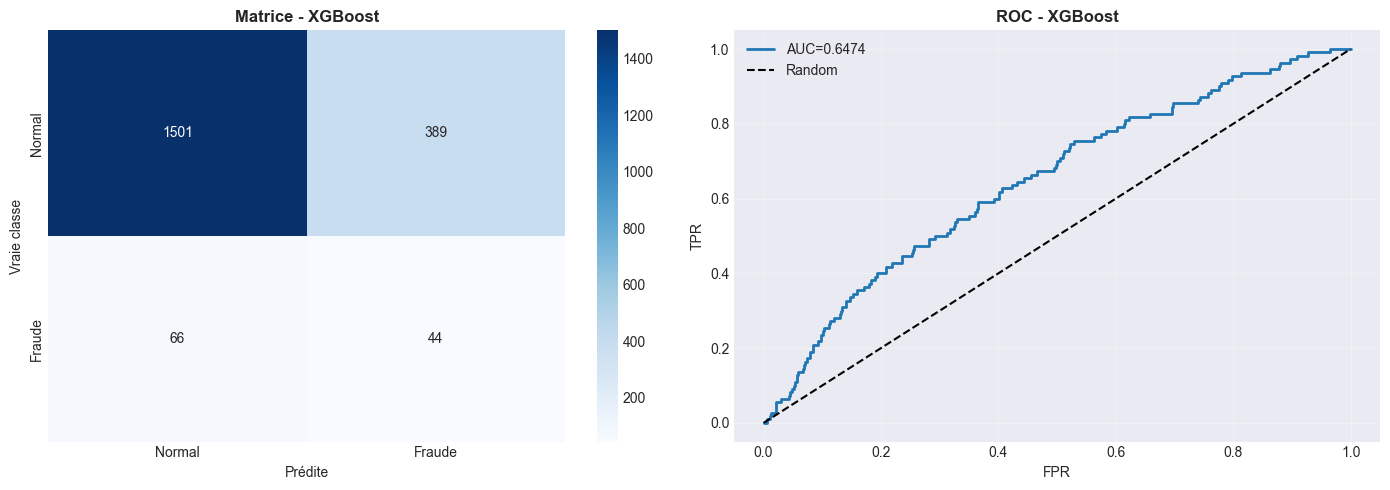

In [6]:
# XGBOOST avec Optuna
print("🚀 XGBOOST - Optuna (30 trials)")
def obj_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'scale_pos_weight': scale_pos_weight,
        'random_state': 42,
        'eval_metric': 'logloss'
    }
    model = XGBClassifier(**params)
    return cross_val_score(model, X_train, y_train, cv=3, scoring='f1', n_jobs=-1).mean()

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(obj_xgb, n_trials=30, show_progress_bar=True)
print(f"Meilleur F1 (CV): {study_xgb.best_value:.4f}")
print(f"Params: {study_xgb.best_params}")

best_xgb = XGBClassifier(**study_xgb.best_params, scale_pos_weight=scale_pos_weight, random_state=42, eval_metric='logloss')
best_xgb.fit(X_train, y_train)
results_xgb = evaluate(best_xgb, X_test, y_test, "XGBoost")


COMPARAISON
               accuracy  precision  recall      f1  roc_auc
name                                                       
Random Forest    0.7650     0.1070  0.4455  0.1725   0.6695
XGBoost          0.7725     0.1016  0.4000  0.1621   0.6474

🏆 MEILLEUR (Recall): Random Forest


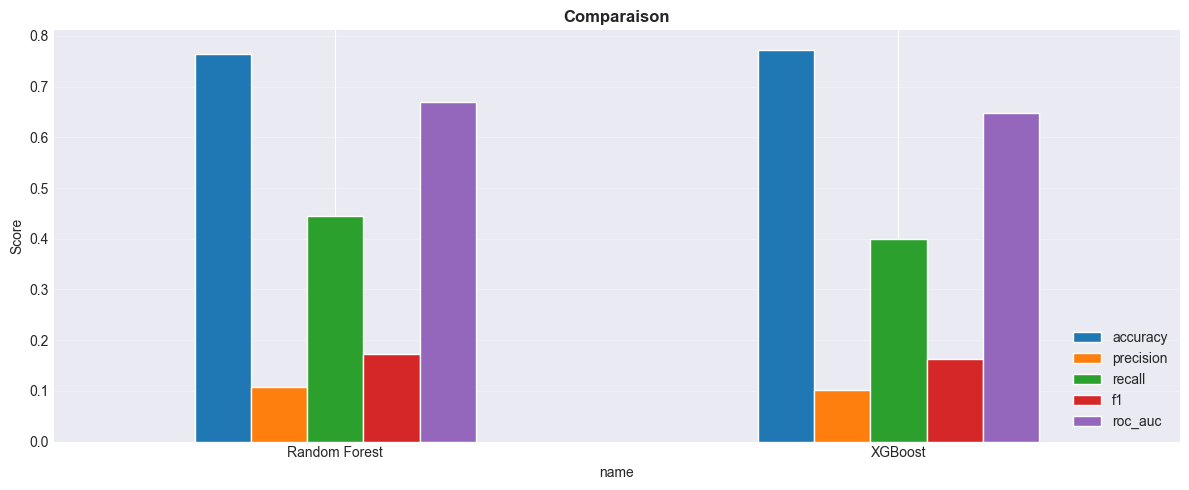

In [7]:
# COMPARAISON
comp = pd.DataFrame([results_rf, results_xgb]).set_index('name')
print("\n" + "="*80)
print("COMPARAISON")
print("="*80)
print(comp.round(4))
best_name = comp['recall'].idxmax()
print(f"\n🏆 MEILLEUR (Recall): {best_name}")

comp.plot(kind='bar', figsize=(12, 5))
plt.title('Comparaison', fontweight='bold')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


📊 Importance - Random Forest
               feature  importance
      account_age_days    0.272025
     country_risk_high    0.171837
      country_risk_low    0.153254
is_foreign_transaction    0.150182
    transaction_amount    0.118712
  num_transactions_24h    0.068953
   country_risk_medium    0.034791
    device_type_mobile    0.010713
   device_type_desktop    0.010463
    device_type_tablet    0.009071


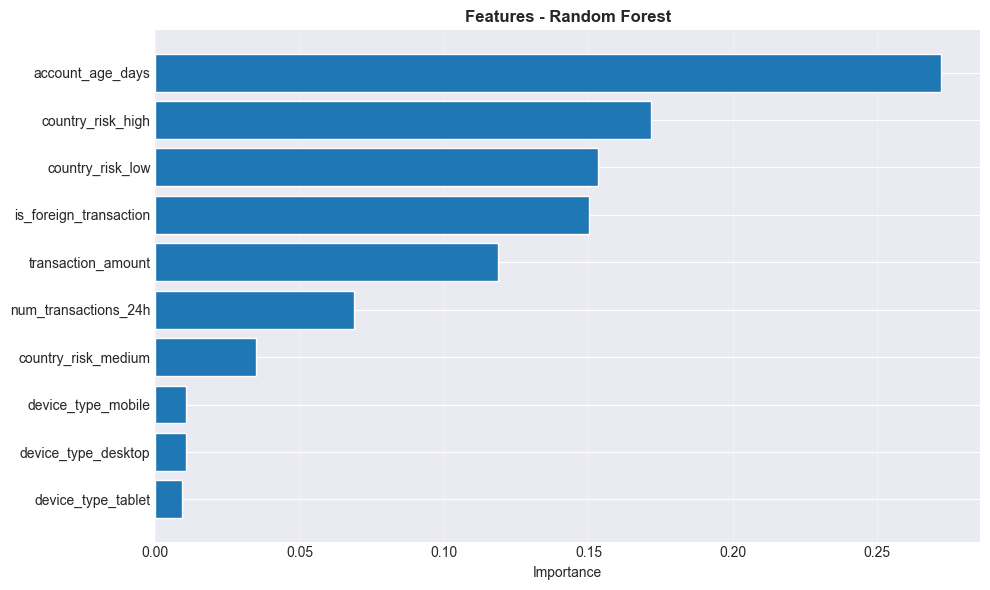

In [8]:
# Importance des features
best_model = best_rf if best_name == 'Random Forest' else best_xgb
feat_imp = pd.DataFrame({'feature': X.columns, 'importance': best_model.feature_importances_}).sort_values('importance', ascending=False)
print(f"\n📊 Importance - {best_name}")
print(feat_imp.to_string(index=False))

plt.figure(figsize=(10, 6))
plt.barh(feat_imp['feature'], feat_imp['importance'])
plt.xlabel('Importance')
plt.title(f'Features - {best_name}', fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [9]:
# Sauvegarde
import pickle
model_path = f'../artifacts/models/best_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(best_model, f)
print(f"✓ Modèle sauvegardé: {model_path}")
comp.to_csv('../artifacts/metrics/comparison.csv')
print("✓ Métriques sauvegardées")

✓ Modèle sauvegardé: ../artifacts/models/best_model.pkl
✓ Métriques sauvegardées
